In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir("E:\\FORE\\Term 2\\Python\\Projectdatasets_DEVP\\Group 9")
t = pd.read_csv("9-Titanic.csv")

In [3]:
t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
t.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<AxesSubplot:xlabel='Survived', ylabel='count'>

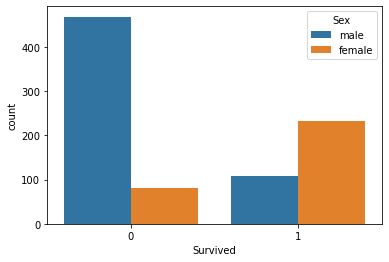

In [30]:
sns.countplot(x='Survived',  data= t,hue = "Sex") 
#proportion of female survivors is much higher in comparison to their total count

In [31]:
bins = [0, 6, 15, 18,30,60, 100]
names = ['Infant or New born(0-6)', 'Middle School(7-15)', 'Adolescent(16-18)','Young Adult(19-30)' ,'Adult(31-60)', 
         'Senior(60+)']
t['Age Category'] = pd.cut(t['Age'], bins, labels=names)
t
#creating categories for Ages of passengers onboard Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult(19-30)
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult(31-60)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult(19-30)
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult(31-60)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult(31-60)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Young Adult(19-30)
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Young Adult(19-30)
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Young Adult(19-30)


In [8]:
t2 = t.groupby("Pclass")["Survived"].sum()

In [9]:
t2

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

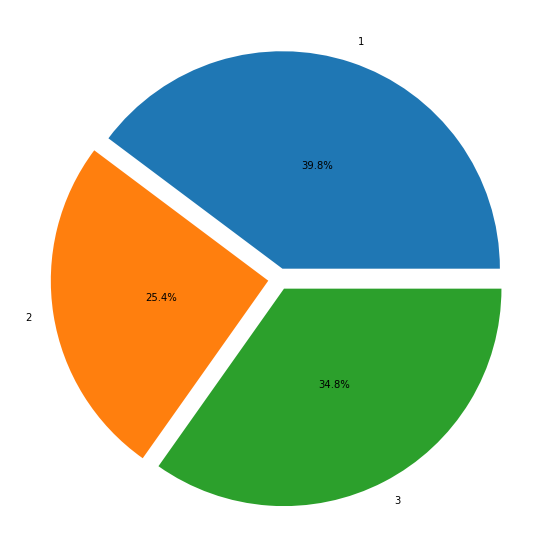

In [32]:
pie, ax = plt.subplots(figsize=[12,10])
labels = t2.keys()
_=plt.pie(x=t2, autopct="%.1f%%", explode=[0.05]*3, labels=labels, pctdistance=0.5)
#proportion of passenger classes who survived out of total passengers who survived

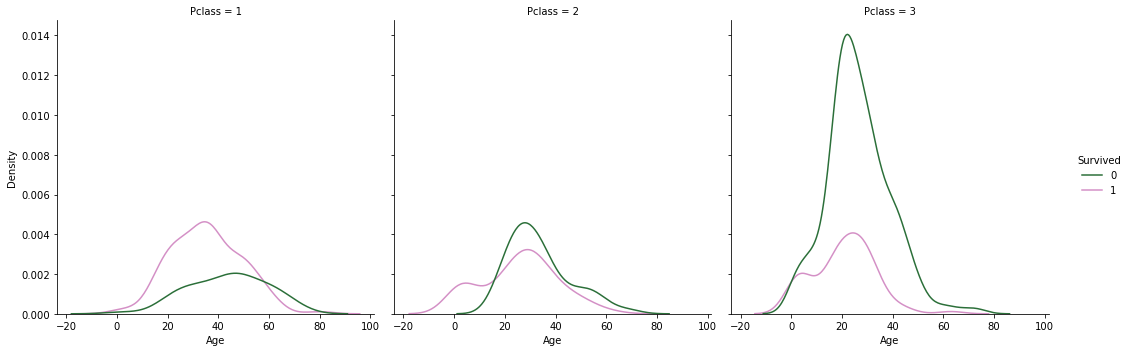

In [33]:

_=sns.displot(x = "Age", kind = "kde", hue = "Survived",col = "Pclass", data = t,palette = "cubehelix")

#proportion of passengers from 1st class survived more as a proportion to their total number,
#while passengers from 2nd class had the highest mortality rate

<AxesSubplot:xlabel='Survived', ylabel='count'>

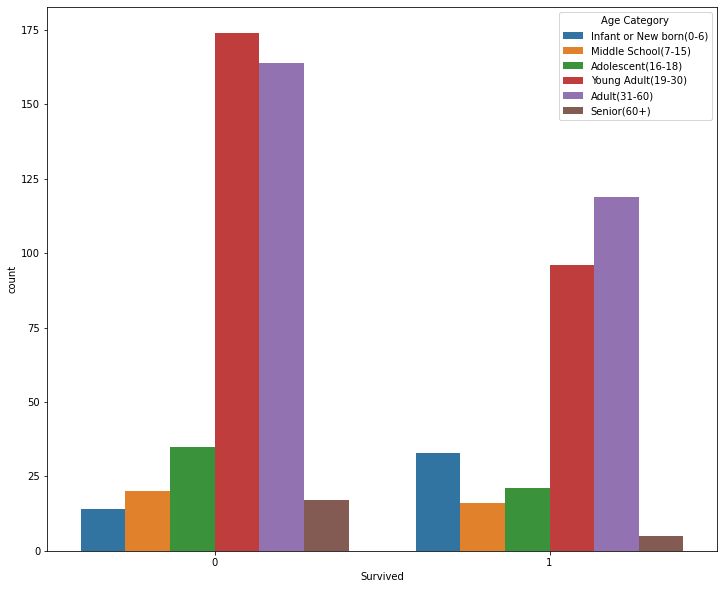

In [11]:
plt.figure(figsize = (12,10))
sns.countplot(x='Survived',  data= t,hue = "Age Category")

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

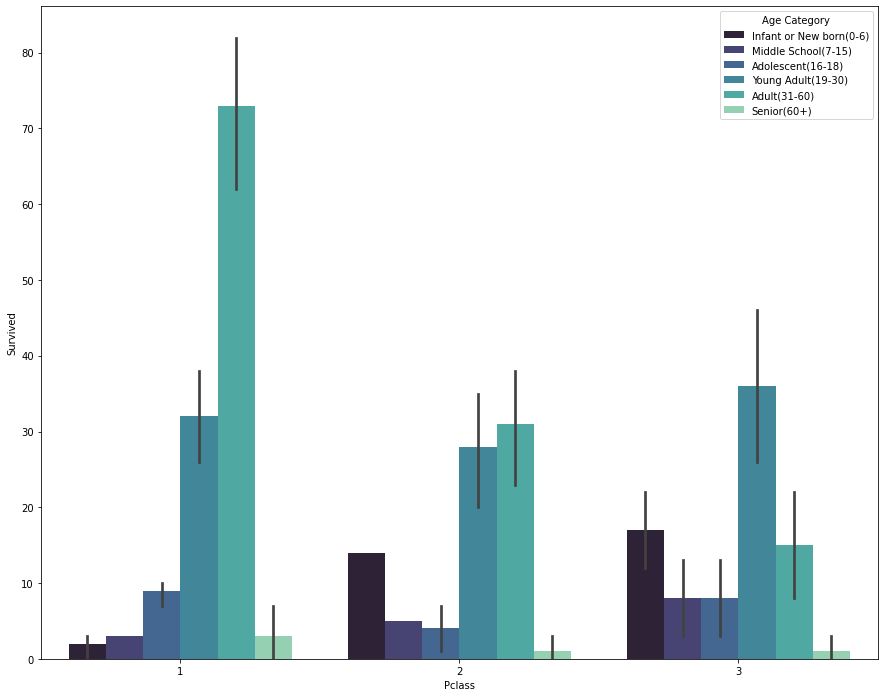

In [12]:
plt.figure(figsize = (15,12))
sns.barplot(x="Pclass", y= "Survived", hue = "Age Category",data=t,estimator = sum
                 ,palette="mako")

(0.0, 270.0)

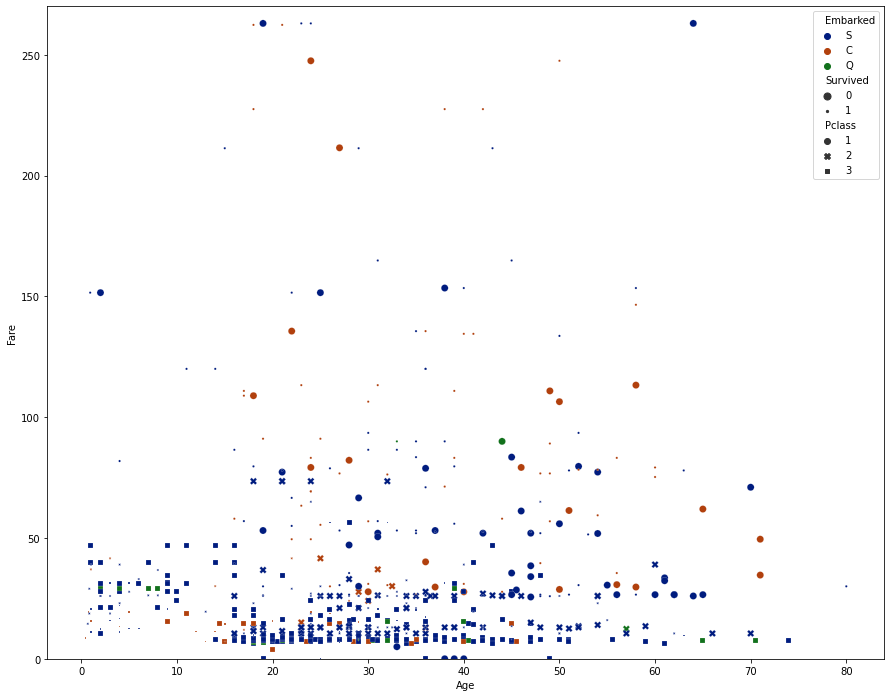

In [34]:
plt.figure(figsize = (15,12))
ax = sns.scatterplot(x = "Age", y= t["Fare"] , hue = "Embarked", style = "Pclass", size = "Survived",
                sizes = (5,50),  data= t,palette = "dark")

ax.set_ylim(0, 270)

#trying to establish and explore Pclass fare with respect to their start of journey and age

In [14]:
t

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult(19-30)
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult(31-60)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult(19-30)
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult(31-60)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult(31-60)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Young Adult(19-30)
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Young Adult(19-30)
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Young Adult(19-30)


In [15]:
t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult(19-30)
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult(31-60)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult(19-30)
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult(31-60)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult(31-60)


In [16]:
t.dtypes

PassengerId        int64
Survived           int64
Pclass             int64
Name              object
Sex               object
Age              float64
SibSp              int64
Parch              int64
Ticket            object
Fare             float64
Cabin             object
Embarked          object
Age Category    category
dtype: object

In [17]:
t["Age Category"].value_counts()

Adult(31-60)               283
Young Adult(19-30)         270
Adolescent(16-18)           56
Infant or New born(0-6)     47
Middle School(7-15)         36
Senior(60+)                 22
Name: Age Category, dtype: int64

In [18]:
t3 = t.groupby(['Survived','Pclass'])

In [19]:
t3.count()

PassengerId  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Survived Pclass                                                            
0        1                80    80   80   64     80     80      80    80   
         2                97    97   97   90     97     97      97    97   
         3               372   372  372  270    372    372     372   372   
1        1               136   136  136  122    136    136     136   136   
         2                87    87   87   83     87     87      87    87   
         3               119   119  119   85    119    119     119   119   

                 Cabin  Embarked  Age Category  
Survived Pclass                                 
0        1          59        80            64  
         2           3        97            90  
         3           6       372           270  
1        1         117       134           122  
         2          13        87            83  
         3           6       119            85

In [20]:
t4 = t3[["PassengerId"]]

In [35]:
t4.count() #survived and deaths wrt passenger class

PassengerId
Survived Pclass             
0        1                80
         2                97
         3               372
1        1               136
         2                87
         3               119

In [22]:
t5 = t.groupby(['Survived','Sex']).count()

In [23]:
t5[["PassengerId"]]

PassengerId
Survived Sex                
0        female           81
         male            468
1        female          233
         male            109